方針\
$X$エラーについては、$p=[5\times10^{-2},10^{-1}]$を補完して、$p=10^{-4},5\times10^{-4}$を求める。
その後、符合距離の関数として求め直す。
$Z$エラーについては、$p=10^{-4},5\times10^{-4}$から、符合距離の関数として求め直す。

# d1=3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

## Xエラー

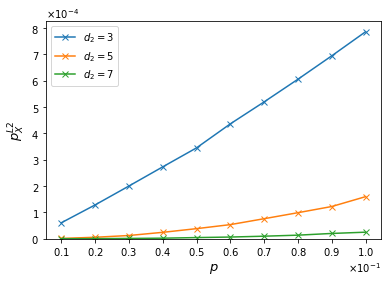

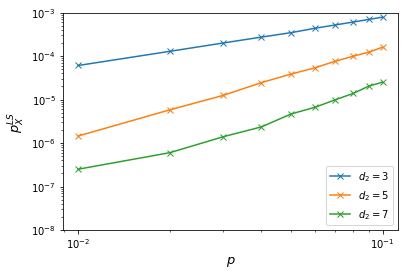

In [4]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.001)
ax.legend()

### 線形回帰

p(10^{-4})= [2.30756088e-07 1.17103802e-10 7.75089455e-13]
p(5*10^{-4})= [1.53576190e-06 3.13064516e-09 4.35239679e-11]


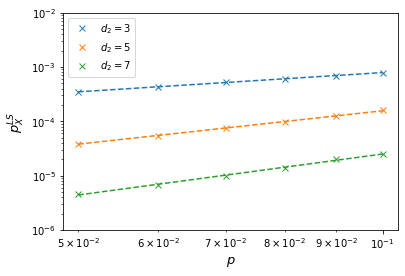

In [5]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
data2 = data2.iloc[:,4:]
code_distance_list = data2.index
p_list = data2.columns
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

p_10_4 = np.array([])
p_5_10_4 = np.array([])

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        p_10_4=np.append(p_10_4,10**clf.predict([[-4]]))
        p_5_10_4=np.append(p_5_10_4,10**clf.predict([[-4+np.log10(5)]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        p_10_4=np.append(p_10_4,10**clf.predict([[-4]]))
        p_5_10_4=np.append(p_5_10_4,10**clf.predict([[-4+np.log10(5)]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

print("p(10^{-4})=", p_10_4)
print("p(5*10^{-4})=", p_5_10_4)

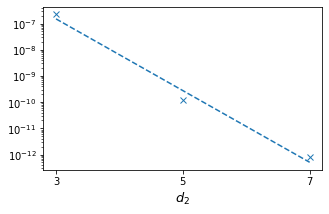

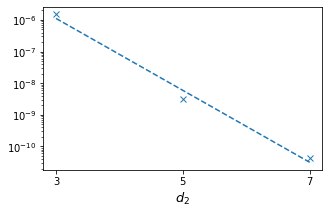

In [6]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10(p_10_4)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_x1 = clf.coef_
b_x1 = clf.intercept_
def pL_X_3_1(code_distance):
    return 10**(a_x1*code_distance+b_x1)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], p_10_4,marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10(p_5_10_4)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_x5 = clf.coef_
b_x5 = clf.intercept_
def pL_X_3_5(code_distance):
    return 10**(a_x5*code_distance+b_x5)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], p_5_10_4,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

### Zエラー

$Z$エラーについては、直接サンプリングによって得られた結果を用いることにする。
→もっと精度を高めて計算すべきかも

In [7]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-7, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="

hokan= [0.00149154] 

hokan= [7.79812862e-05] 

hokan= [8.22047737e-07] 

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [2.51427613e+10 2.51666321e+10 2.51905255e+10 2.52144416e+10
 2.52383805e+10 2.52623420e+10 2.52863263e+10 2.53103334e+10
 2.53343632e+10 2.53584159e+10]


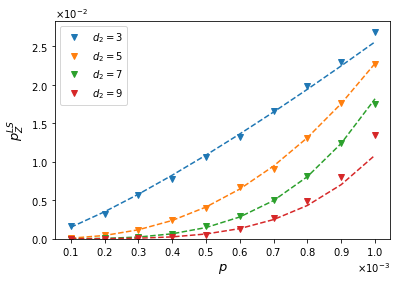

In [8]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.set_ylim(0.000001, 0.1)
ax.legend()

[-0.62863694]
0.11813203871846018
[-0.20143286]
0.04218995331412383


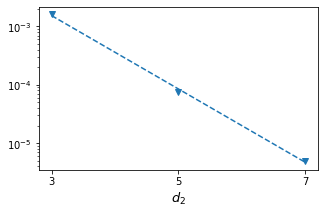

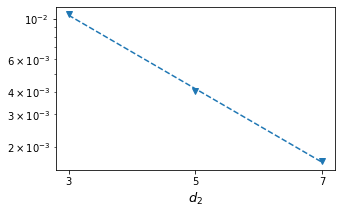

In [9]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_z1 = clf.coef_
b_z1 = clf.intercept_
print(clf.coef_)
print(10**clf.intercept_)
def pL_Z_3_1(code_distance):
    return 10**(a_z1*code_distance+b_z1)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_z5 = clf.coef_
b_z5 = clf.intercept_
print(clf.coef_)
print(10**clf.intercept_)
def pL_Z_3_5(code_distance):
    return 10**(a_z5*code_distance+b_z5)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

寿命の計算

1.5040398188771934e-07
[1.53623227e-03 8.49538388e-05 4.69795802e-06 2.59797672e-07
 1.43668441e-08 7.94488294e-10 4.39353031e-11 2.42962781e-12]


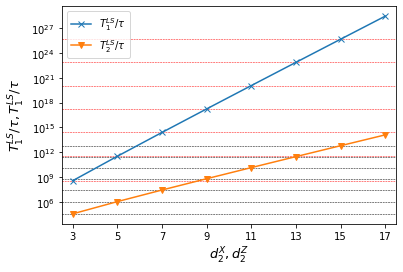

In [10]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13,15,17])
cm = plt.get_cmap("tab10")
print(pL_X_3_1(code_distance_list)[0])
print(pL_Z_3_1(code_distance_list))
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_X_3_1(code_distance_list),marker='x',label=r"$T^{LS}_1/\tau$")
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_Z_3_1(code_distance_list),marker='v',label=r"$T^{LS}_2/\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_X_3_1(code_distance_list[i])[0]], 0, 22, "r", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_Z_3_1(code_distance_list[i])[0]], 0, 22, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$T^{LS}_1/\tau, T^{LS}_1/\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_xlim(2.5,17.5)
ax.set_yscale("log")
ax.legend()
plt.show()

[ 65. 117. 169. 221. 393. 485. 577. 669. 961.]
[3.51509345e+04 1.05939886e+06 2.68201630e+07 3.59033048e+08
 6.23562169e+08 1.37817323e+10 2.94529198e+11 3.26500496e+11
 6.14539974e+12]


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (11).

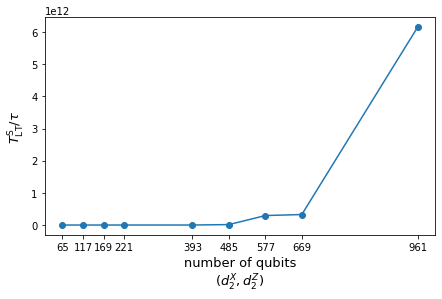

In [12]:
cd_list_s =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13],[5,15],[7,15]]
lifetime_list_s = np.array([])
number_list_s = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list_s:
    a = (4*3+6)*cd[0] /pL_X_3_1(cd[0])[0]
    b = (4*3+6)*cd[1] /pL_Z_3_1(cd[1])[0]
    lifetime_list_s = np.append(lifetime_list_s,min(a,b))
    number_list_s = np.append(number_list_s,qubits_number(3,cd[0],cd[1]))
print(number_list_s)
print(lifetime_list_s)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(number_list_s, lifetime_list_s,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau$', fontsize=13)
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$",r"$669$"+"\n"+r"$(5,15)$",r"$961$"+"\n"+r"$(5,17)$",
                    r"$1093$"+"\n"+r"$(7,17)$",r"1425"+"\n"+r"$(5,13)$"
                    ])
label_list = []
for i in range(len(cd_list_s)):
    label_list.append(str(int(number_list_s[i]))+"\n"+r"$($"+str(int(cd_list_s[i][0]))+","+str(int(cd_list_s[i][1]))+r"$)$")
print(label_list)
ax.set_yscale("log")
#ax.legend()
plt.show()

比較

 [ 77. 129. 229. 321. 461.]


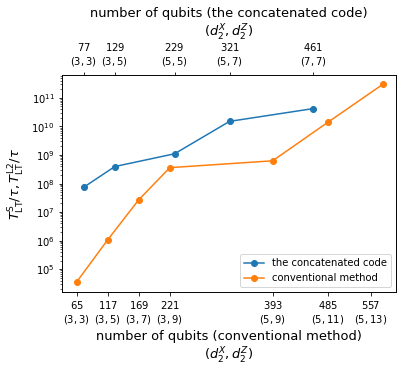

In [19]:
# 連接符号
cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([7.4*10**7,392999999,1.1*10**9,15021666666,42091000000.0])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print("", number_list)

fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
ax.plot(number_list, lifetime_list,marker='o',label="the concatenated code")
# 疎な表面符号
#ax.plot([65,117,169,221,393,485,557], 
        #np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
                  #6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,
                  #marker='o',label="sparse surface code")
cd_list_s =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13],[5,15],[7,15]]
ax.plot(number_list_s[:-2], lifetime_list_s[:-2],marker='o',label="conventional method")
ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (the concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau, T_{\mathrm{LT}}^{\mathrm{L2}}/\tau$', fontsize=13)
ax.set_xticks([65,117,169,221,393,485,557])
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(40,600)
ax2.set_xlim(40,600)
ax.legend(loc="lower right")
plt.show()

 [ 77. 129. 229. 321. 461.]


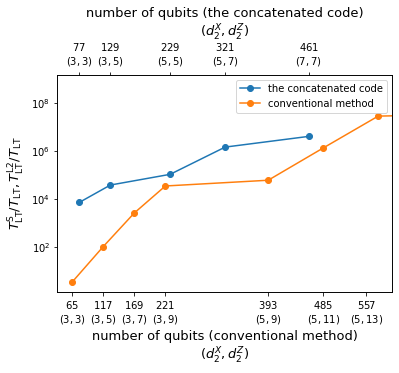

In [14]:
# 連接符号
cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([7.4*10**7,392999999,1.1*10**9,15021666666,42091000000.0])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print("", number_list)

fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
ax.plot(number_list, lifetime_list/10000,marker='o',label="the concatenated code")
# 疎な表面符号
#ax.plot([65,117,169,221,393,485,557], 
        #np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
                  #6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,
                  #marker='o',label="sparse surface code")
cd_list_s =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13],[5,15],[7,15]]
ax.plot(number_list_s, lifetime_list_s/10000,marker='o',label="conventional method")
ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (the concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([65,117,169,221,393,485,557,669,961])
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$",r"$669$"+"\n"+r"$(5,15)$",r"$961$"+"\n"+r"$(5,15)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(40,600)
ax2.set_xlim(40,600)
ax.legend()
plt.show()

 [ 77. 129. 229. 321. 461.]


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (9).

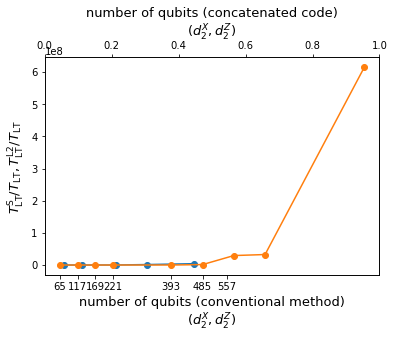

In [218]:
# 連接符号
cd_list =[[3,3],[3,5],[5,5],[5,7],[7,7]]
lifetime_list = np.array([7.4*10**7,392999999,1.1*10**9,15021666666,42091000000.0])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print("", number_list)

fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
# 疎な表面符号
#ax.plot([65,117,169,221,393,485,557], 
        #np.array([3.51509345e+04, 1.05939886e+06, 2.68201630e+07, 2.20340540e+08,
                  #6.23562169e+08, 1.37817323e+10, 4.85916186e+10])/10000,
                  #marker='o',label="sparse surface code")
cd_list_s =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13],[5,15],[7,15]]
ax.plot(number_list_s, lifetime_list_s/10000,marker='o',label="conventional method")
ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
ax.set_xticks([65,117,169,221,393,485,557])
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$",r"$669$"+"\n"+r"$(5,15)$",r"$961$"+"\n"+r"$(7,15)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$229$"+"\n"+r"$(5,5)$",r"$321$"+"\n"+r"$(5,7)$",r"$461$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(40,1000)
ax2.set_xlim(40,1000)
ax.legend()
plt.show()

1.1152180127614926e-06
[0.01049326 0.00414997 0.00164127 0.0006491  0.00025671 0.00010153]


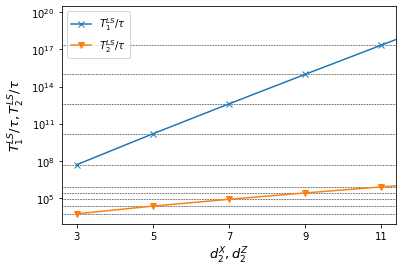

In [20]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_3_5(code_distance_list)[0])
print(pL_Z_3_5(code_distance_list))
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_X_3_5(code_distance_list),marker='x',label=r"$T^{LS}_1/\tau$")
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_Z_3_5(code_distance_list),marker='v',label=r"$T^{LS}_2/\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_X_3_5(code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_Z_3_5(code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$T^{LS}_1/\tau, T^{LS}_2/\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[ 65. 117. 169. 221. 393. 485. 577.]
[   5146.16001384   21686.91361461   76769.99267895  249575.34640818
  249575.34640818  771289.77200704 2304803.75793776]


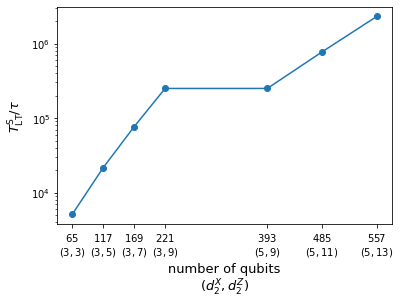

In [21]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[5,9],[5,11],[5,13]]
lifetime_list_s = np.array([])
number_list_s = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*3+6)*cd[0] /pL_X_3_5(cd[0])[0]
    b = (4*3+6)*cd[1] /pL_Z_3_5(cd[1])[0]
    lifetime_list_s = np.append(lifetime_list_s,min(a,b))
    number_list_s = np.append(number_list_s,qubits_number(3,cd[0],cd[1]))
print(number_list_s)
print(lifetime_list_s)
fig, ax = plt.subplots()
ax.plot(number_list_s, lifetime_list_s,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau$', fontsize=13)
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$"])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

 [ 77. 129. 181.]


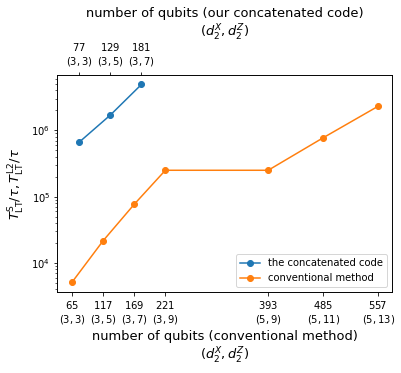

In [24]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
cd_list =[[3,3],[3,5],[3,7]]
lifetime_list = np.array([662806.0563070226,1695832.4548457374,4900444.393143648])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print("", number_list)
ax.plot(number_list, lifetime_list,marker='o',label="the concatenated code")
# 疎な表面符号
ax.plot(number_list_s, lifetime_list_s,marker='o',label="conventional method")


ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (our concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau, T_{\mathrm{LT}}^{\mathrm{L2}}/\tau$', fontsize=13)

ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$65$"+"\n"+r"$(3,3)$",r"$117$"+"\n"+r"$(3,5)$",r"$169$"+"\n"+r"$(3,7)$",
                    r"$221$"+"\n"+r"$(3,9)$",r"$393$"+"\n"+r"$(5,9)$",r"$485$"+"\n"+r"$(5,11)$",
                    r"$557$"+"\n"+r"$(5,13)$"])
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$77$"+"\n"+r"$(3,3)$",r"$129$"+"\n"+r"$(3,5)$",r"$181$"+"\n"+r"$(3,7)$",])
ax.set_yscale("log")
ax.set_xlim(40,600)
ax2.set_xlim(40,600)
ax.legend()
plt.show()

In [23]:
cd_list =[[3,3],[5,5],[7,7],[9,9],[7,9],[5,19]]
# 疎な表面符号
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
number_list = np.array([])
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print(number_list)

# 連接符号
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
number_list = np.array([])
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(3,cd[0],cd[1]))
print(number_list)

[ 65. 209. 433. 737. 565. 853.]
[ 77. 229. 461. 773. 593. 873.]
